<h1>Dragon Real Estate - Price Predictor</h1>

# Boston House Price Predictor using ML

Project Information:
This is my 1st Machine learning Project. I am taking data of boston house pricing from kaggle and apllying machine learning
to predict prices if we have provided with new feature of a house.

Date - 16/11/2023

Time - 12:00 p.m

Author - Shrihari Thiyagarajan(VIT Vellore, CSE)

$Atrributes of the data$

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Boston_house_price_data.csv")

In [3]:
housing.head() #displays first 5 rows


,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() #can be used to check if there is any data that is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZM       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts() #tells frequency of values
# housing.describe()

CHAS
0    471
1     35
Name: count, dtype: int64

## Plotting histogram

In [6]:

'''says we want to see our graphs here only.'''
%matplotlib inline 

In [7]:
# import matplotlib.pyplot as plt
# housing.hist(bins = 50, figsize=(20,15))
# #plt.show()  #need this outside jupyter notebook to show the graphs

<u><b>Benefit of histogram</u></b> We can analyse data overall, and check if anything is fishy, or we made an error in data somewhere 

## Train-Test Splitting

In [8]:
#For learning purpose

# import numpy as np
# def split_train_test(data,test_ratio): #fn already exists in sklearn.model_selection
#     np.random.seed(42) #fixes the permutation, so that it doesnt change in every compilation
#     shuffled= np.random.permutation(len(data)) #?
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

#train_set,test_set = split_train_test(housing,0.2)
#print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}")

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size = 0.2, random_state = 42)
print(f"Rows in train set : {len(train_set)} \nRows in test set : {len(test_set)}")


Rows in train set : 404 
Rows in test set : 102


In [10]:
'''Sometimes, we while creating training set, we might enitrely miss out few values of data
here, chas attribute has only 35entries with val=1, so if we miss them in our training set, out algorithm will completely change.
to avoid that, we use Stratified ShuffleSplit
'''
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

## Looking for Correlations

In [13]:
corr_matrix = housing.corr() #corr_matrix -> correlation matrix

In [14]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZM         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

**What is correlation**

if one value increases, doe the other value go up or down. This is called pearson correlation coefficient
1 => strong positive correlation
if corr >0. means that that field(corresponding to that no.)  increases when given fiel increases.

Similarly, corr<0  => reduces with increase in given field

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZM', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZM', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZM'>,
        <Axes: xlabel='RM', ylabel='ZM'>,
        <Axes: xlabel='ZM', ylabel='ZM'>,
        <Axes: xlabel='LSTAT', ylabel='ZM'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZM', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

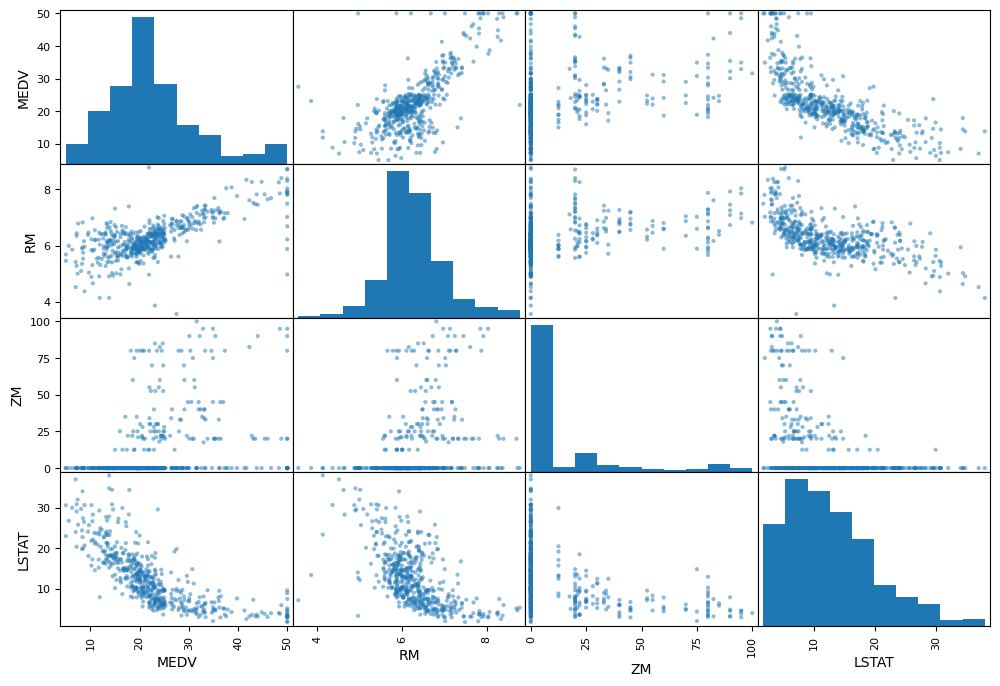

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZM","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

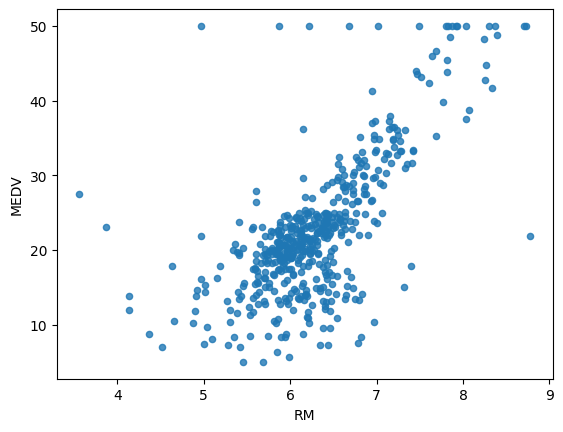

In [23]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.8)

## Trying Atribute Combinations

we can create our own attributes by combining 2 attributes.

In [25]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]
housing.head()

,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [26]:
corr_matrix = housing.corr() #corr_matrix -> correlation matrix
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZM         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

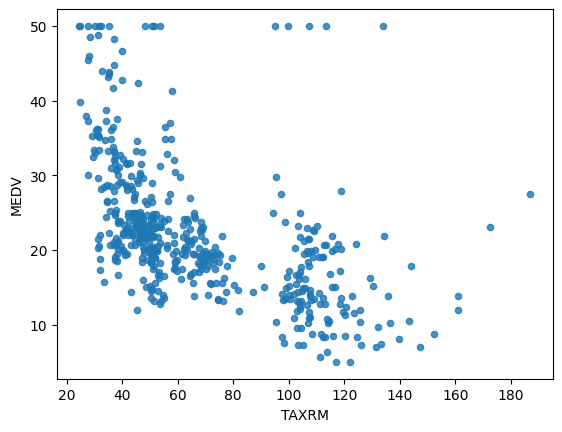

In [27]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 0.8)